In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [62]:
transaction_df = pd.read_excel("QVI_transaction_data.xlsx")

customer_df = pd.read_csv("QVI_purchase_behaviour.csv")

In [63]:
transaction_df.head()

transaction_df.info()

customer_df.head()

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
m

In [64]:
#Clean
print("Missing values in transaction_df:")
print(transaction_df.isnull().sum())

print("\nMissing values in customer_df:")
print(customer_df.isnull().sum())

print("\nCheck for zero or negative quantities and sales in transaction_df:")
print("Zero or negative PROD_QTY:", (transaction_df['PROD_QTY'] <= 0).sum())
print("Zero or negative TOT_SALES:", (transaction_df['TOT_SALES'] <= 0).sum())

transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'], origin='1899-12-30', unit='D')
print("\nSample dates after conversion:")
print(transaction_df['DATE'].head())

print("\nUnique values in LIFESTAGE:")
print(customer_df['LIFESTAGE'].unique())


print("\nUnique values in PREMIUM_CUSTOMER:")
print(customer_df['PREMIUM_CUSTOMER'].unique())

Missing values in transaction_df:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Missing values in customer_df:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Check for zero or negative quantities and sales in transaction_df:
Zero or negative PROD_QTY: 0
Zero or negative TOT_SALES: 0

Sample dates after conversion:
0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

Unique values in LIFESTAGE:
['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']

Unique values in PREMIUM_CUSTOMER:
['Premium' 'Mainstream' 'Budget']


In [65]:
merged_df = pd.merge(transaction_df, customer_df, on='LYLTY_CARD_NBR', how='left')

import re
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

# Merging the two files and cleaning up extra spaces

In [66]:
merged_df.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [67]:
merged_df[['LIFESTAGE', 'PREMIUM_CUSTOMER']].isnull().sum()


LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [68]:
# Units by demographic
units_by_lifestage = merged_df.groupby('LIFESTAGE')['PROD_QTY'].sum().sort_values(ascending=False)
print(units_by_lifestage)


LIFESTAGE
OLDER SINGLES/COUPLES     104203
OLDER FAMILIES             94992
RETIREES                   94166
YOUNG FAMILIES             84561
YOUNG SINGLES/COUPLES      66634
MIDAGE SINGLES/COUPLES     47721
NEW FAMILIES               12847
Name: PROD_QTY, dtype: int64


In [69]:
# Total Sales $ by Demographic
sales_by_lifestage = merged_df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False)
print(sales_by_lifestage)


LIFESTAGE
OLDER SINGLES/COUPLES     402426.75
RETIREES                  366470.90
OLDER FAMILIES            353767.20
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
Name: TOT_SALES, dtype: float64


In [70]:
#Quantity by Customer Type
avg_qty_by_customer = merged_df.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].mean()
print(avg_qty_by_customer)


PREMIUM_CUSTOMER
Budget        1.909658
Mainstream    1.901841
Premium       1.912169
Name: PROD_QTY, dtype: float64


In [71]:
# Top Five by Q
top_products = merged_df.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False).head(5)
print(top_products)


PROD_NAME
Dorito Corn Chp Supreme 380g                6509
Kettle Mozzarella Basil & Pesto 175g        6381
Kettle Tortilla ChpsHny&Jlpno Chili 150g    6309
Cobs Popd Sea Salt Chips 110g               6277
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    6256
Name: PROD_QTY, dtype: int64


In [72]:
# Top 5 by Sales

top_sales_products = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(5)
print(top_sales_products)


PROD_NAME
Dorito Corn Chp Supreme 380g                40352.0
Smiths Crnkle Chip Orgnl Big Bag 380g       36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella Basil & Pesto 175g        34457.4
Smiths Crinkle Original 330g                34302.6
Name: TOT_SALES, dtype: float64


In [88]:
price_per_chip = merged_df.groupby('PROD_NAME').agg({
    'PROD_QTY': 'sum',
    'TOT_SALES': 'sum'
})

price_per_chip['AVG_PRICE_PER_BAG'] = price_per_chip['TOT_SALES'] / price_per_chip['PROD_QTY']
price_per_chip = price_per_chip.sort_values('AVG_PRICE_PER_BAG', ascending=False)

price_per_chip.head()



,PROD_QTY,TOT_SALES,AVG_PRICE_PER_BAG
PROD_NAME,,,
Dorito Corn Chp Supreme 380g,6509,40352.0,6.199416
Smiths Crnkle Chip Orgnl Big Bag 380g,6164,36367.6,5.900000
Smiths Crinkle Chips Salt & Vinegar 330g,6106,34804.2,5.700000
Smiths Crinkle Original 330g,6018,34302.6,5.700000
Doritos Cheese Supreme 330g,5858,33390.6,5.700000


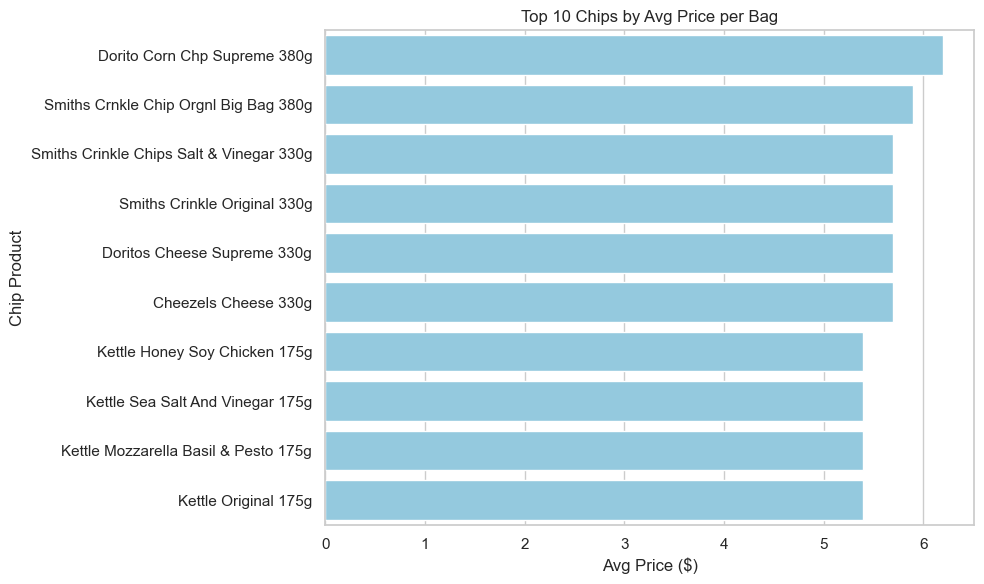

In [92]:
top_avg_price = price_per_chip['AVG_PRICE_PER_BAG'].head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_avg_price.values, y=top_avg_price.index, color='skyblue')
plt.title('Top 10 Chips by Avg Price per Bag')
plt.xlabel('Avg Price ($)')
plt.ylabel('Chip Product')
plt.tight_layout()
plt.show()



In [73]:
# Bottom 5 by Sales

bottom_sales_products = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=True).head(5)
print(bottom_sales_products)


PROD_NAME
Woolworths Medium Salsa 300g             4050.0
Woolworths Mild Salsa 300g               4234.5
WW Crinkle Cut Original 175g             4532.2
Sunbites Whlegrn Crisps Frch/Onin 90g    4600.2
WW Crinkle Cut Chicken 175g              4702.2
Name: TOT_SALES, dtype: float64


In [74]:
#Sales by Month
merged_df['YEAR_MONTH'] = merged_df['DATE'].dt.to_period('M')
sales_over_time = merged_df.groupby('YEAR_MONTH')['TOT_SALES'].sum()
print(sales_over_time)


YEAR_MONTH
2018-07    165275.30
2018-08    158731.05
2018-09    160522.00
2018-10    164415.70
2018-11    160233.70
2018-12    167913.40
2019-01    162642.30
2019-02    150665.00
2019-03    166265.20
2019-04    159845.10
2019-05    157367.65
2019-06    160538.60
Freq: M, Name: TOT_SALES, dtype: float64


In [75]:
avg_per_customer = merged_df.groupby('LIFESTAGE').agg({
    'LYLTY_CARD_NBR': pd.Series.nunique,
    'TOT_SALES': 'sum'
})
avg_per_customer['AVG_SPEND_PER_CUSTOMER'] = avg_per_customer['TOT_SALES'] / avg_per_customer['LYLTY_CARD_NBR']
avg_per_customer = avg_per_customer.sort_values('AVG_SPEND_PER_CUSTOMER', ascending=False)
avg_per_customer

,LYLTY_CARD_NBR,TOT_SALES,AVG_SPEND_PER_CUSTOMER
LIFESTAGE,,,
OLDER FAMILIES,9780,353767.20,36.172515
YOUNG FAMILIES,9178,316160.10,34.447603
OLDER SINGLES/COUPLES,14609,402426.75,27.546495
MIDAGE SINGLES/COUPLES,7275,184751.30,25.395368
RETIREES,14805,366470.90,24.753185
NEW FAMILIES,2549,50433.45,19.785583
YOUNG SINGLES/COUPLES,14441,260405.30,18.032359


In [96]:
store_product_sales = merged_df.groupby(['STORE_NBR', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()
top_store_products = store_product_sales.sort_values(['STORE_NBR', 'TOT_SALES'], ascending=[True, False])

print(top_store_products.head(10))


    STORE_NBR                               PROD_NAME  TOT_SALES
6           1                    Cheezels Cheese 330g       57.0
48          1  Old El Paso Salsa Dip Chnky Tom Ht300g       51.0
15          1  Doritos Corn Chips Cheese Supreme 170g       48.4
97          1           Tostitos Smoked Chipotle 175g       48.4
86          1   Smiths Crnkle Chip Orgnl Big Bag 380g       47.2
56          1           Pringles SourCream Onion 134g       44.4
74          1   Smiths Chip Thinly CutSalt/Vinegr175g       42.0
36          1        Kettle Sensations BBQ&Maple 150g       41.4
98          1            Tostitos Splash Of Lime 175g       39.6
35          1        Kettle Sea Salt And Vinegar 175g       37.8


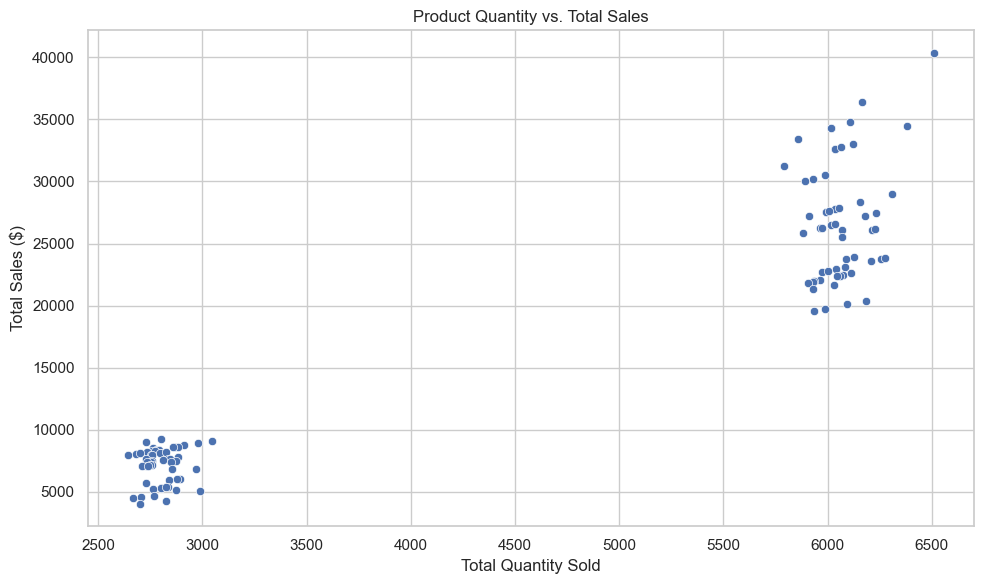

In [94]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=price_per_chip, x='PROD_QTY', y='TOT_SALES')
plt.title('Product Quantity vs. Total Sales')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()


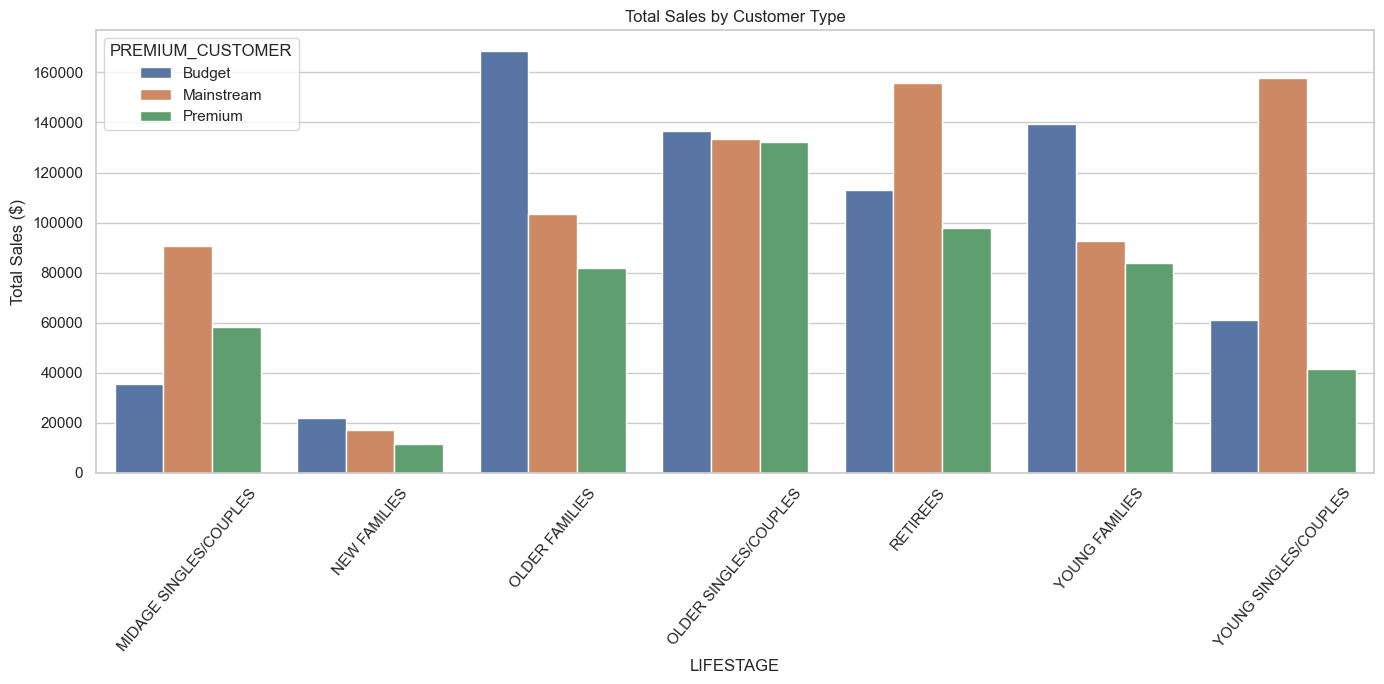

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_by_group = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=sales_by_group, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Sales by Customer Type')
plt.xticks(rotation=50)
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()


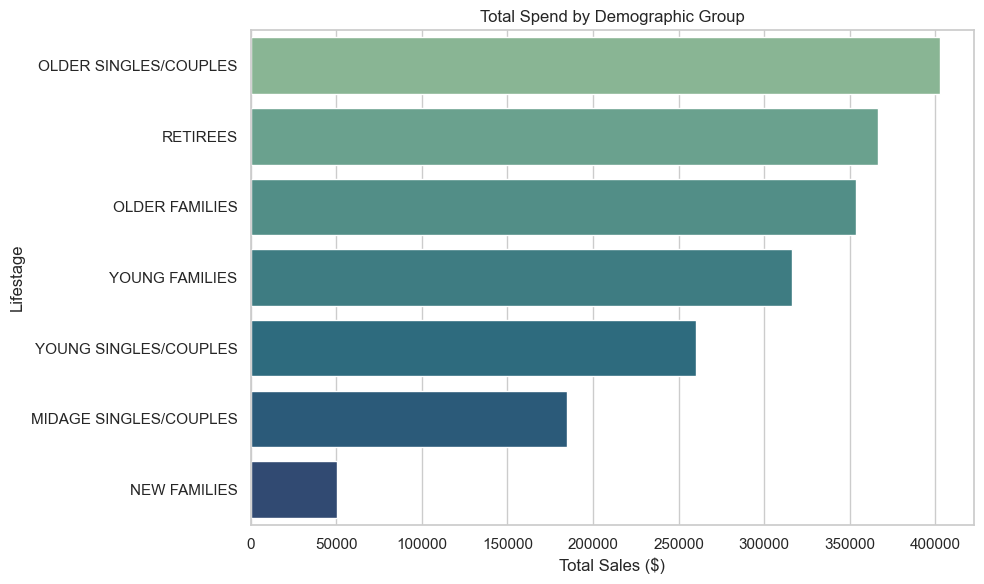

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=sales_by_lifestage.values,
    y=sales_by_lifestage.index,
    hue=sales_by_lifestage.index,  # assign hue to avoid warning
    palette='crest',
    dodge=False,  # prevent separating bars unnecessarily
    legend=False  # we don’t need a redundant legend
)
plt.title('Total Spend by Demographic Group')
plt.xlabel('Total Sales ($)')
plt.ylabel('Lifestage')
plt.tight_layout()
plt.show()


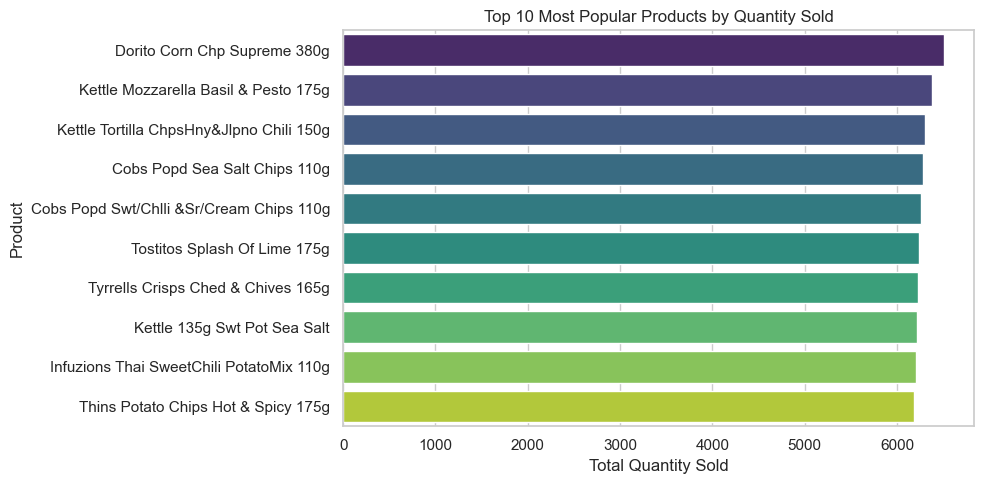

In [78]:
top_products = merged_df.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, dodge=False, palette='viridis', legend=False)
plt.title('Top 10 Most Popular Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


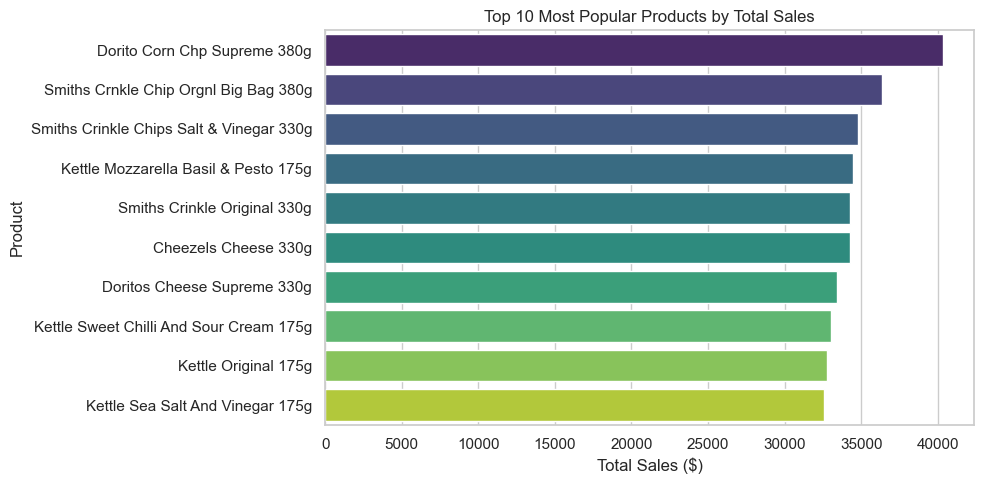

In [79]:
top_sales_products = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_sales_products.values,
    y=top_sales_products.index,
    hue=top_sales_products.index,
    dodge=False,
    palette='viridis',
    legend=False
)
plt.title('Top 10 Most Popular Products by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


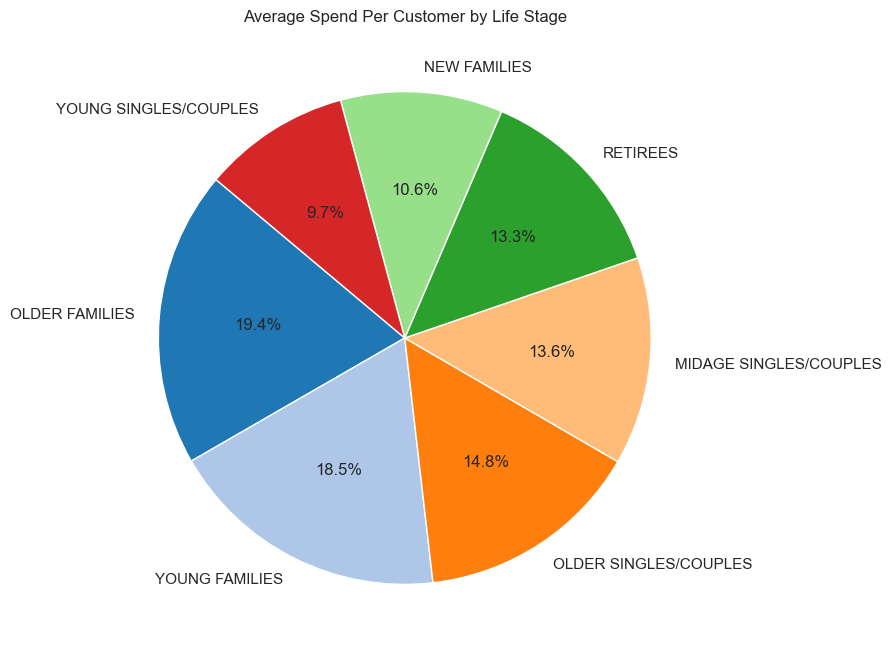

In [80]:
plt.figure(figsize=(8, 8))
plt.pie(
    avg_per_customer_sorted['AVG_SPEND_PER_CUSTOMER'], 
    labels=avg_per_customer_sorted.index,
    autopct='%1.1f%%', 
    startangle=140,
    colors=plt.cm.tab20.colors  
)
plt.title('Average Spend Per Customer by Life Stage')
plt.show()



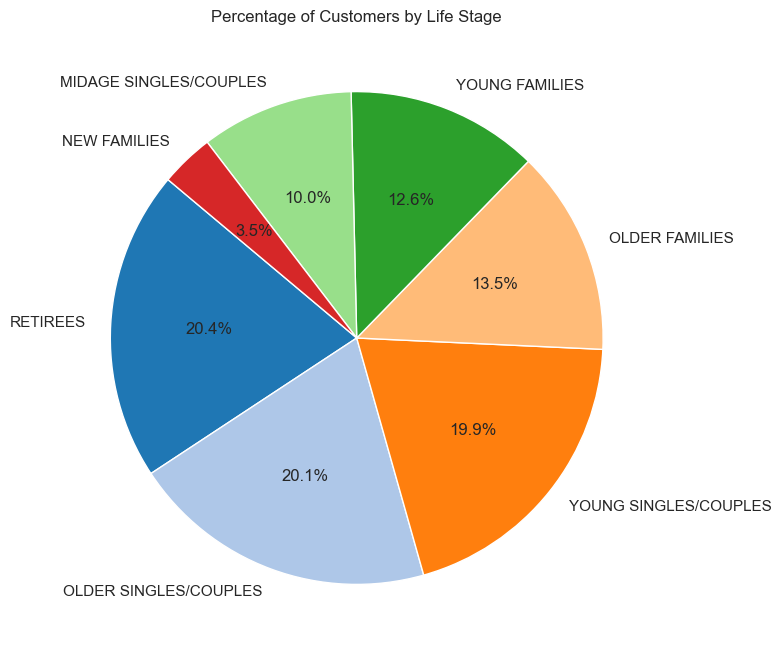

In [81]:
customer_counts = merged_df.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].nunique()

customer_counts_sorted = customer_counts.sort_values(ascending=False)

plt.figure(figsize=(8,8))
plt.pie(
    customer_counts_sorted, 
    labels=customer_counts_sorted.index, 
    autopct='%1.1f%%', 
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Percentage of Customers by Life Stage')
plt.show()



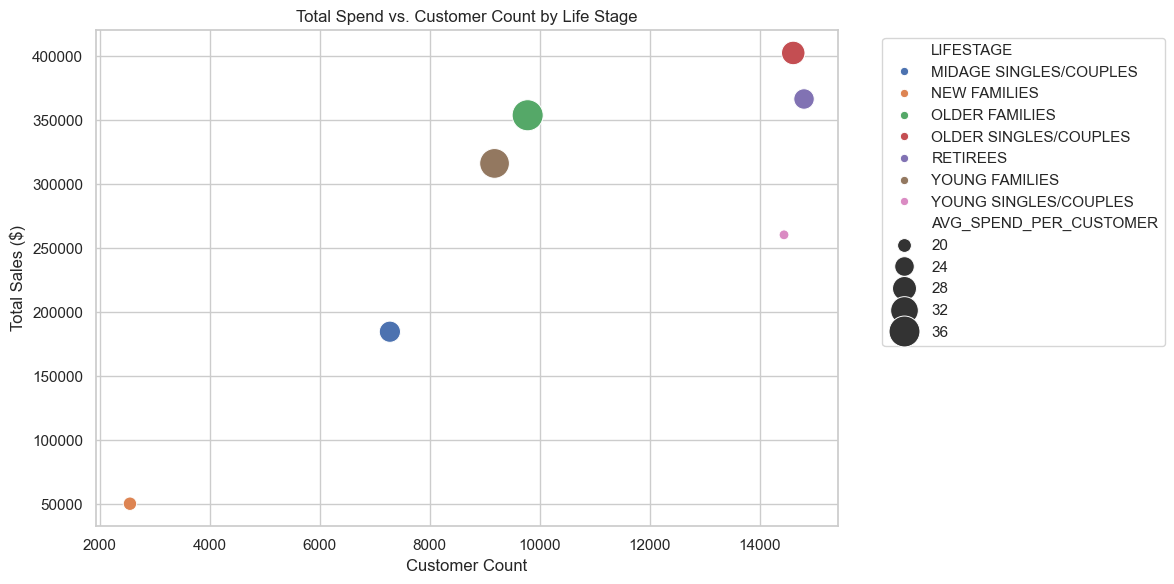

In [82]:
demo_df = merged_df.groupby('LIFESTAGE').agg({
    'LYLTY_CARD_NBR': pd.Series.nunique,
    'TOT_SALES': 'sum'
}).reset_index()

demo_df['AVG_SPEND_PER_CUSTOMER'] = demo_df['TOT_SALES'] / demo_df['LYLTY_CARD_NBR']

plt.figure(figsize=(12,6))
sns.scatterplot(data=demo_df, x='LYLTY_CARD_NBR', y='TOT_SALES', hue='LIFESTAGE', size='AVG_SPEND_PER_CUSTOMER', sizes=(50, 500))
plt.title('Total Spend vs. Customer Count by Life Stage')
plt.xlabel('Customer Count')
plt.ylabel('Total Sales ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


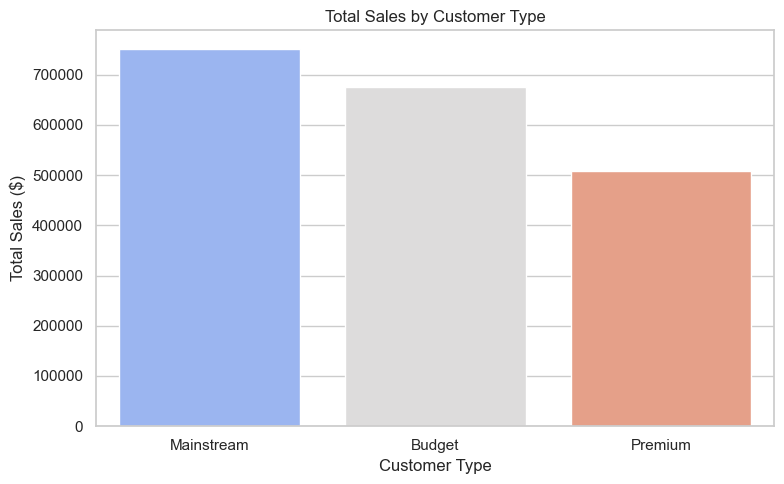

In [83]:
sales_by_segment = merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_segment.index, y=sales_by_segment.values, hue=sales_by_segment.index, palette='coolwarm', legend=False)
plt.title('Total Sales by Customer Type')
plt.ylabel('Total Sales ($)')
plt.xlabel('Customer Type')
plt.tight_layout()
plt.show()

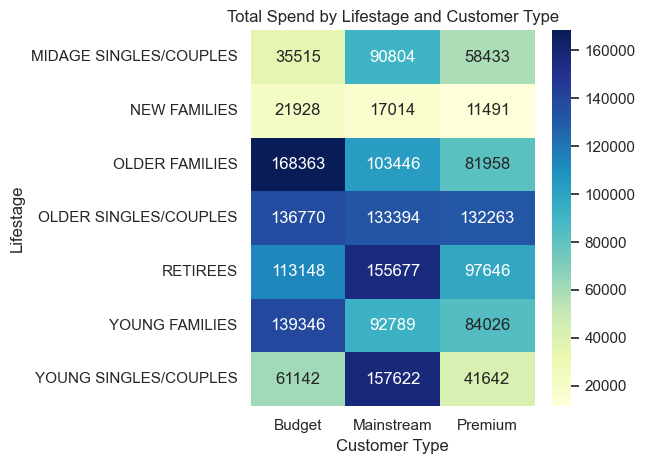

In [84]:
heatmap_data = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()

sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Total Spend by Lifestage and Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Lifestage')
plt.tight_layout()
plt.show()

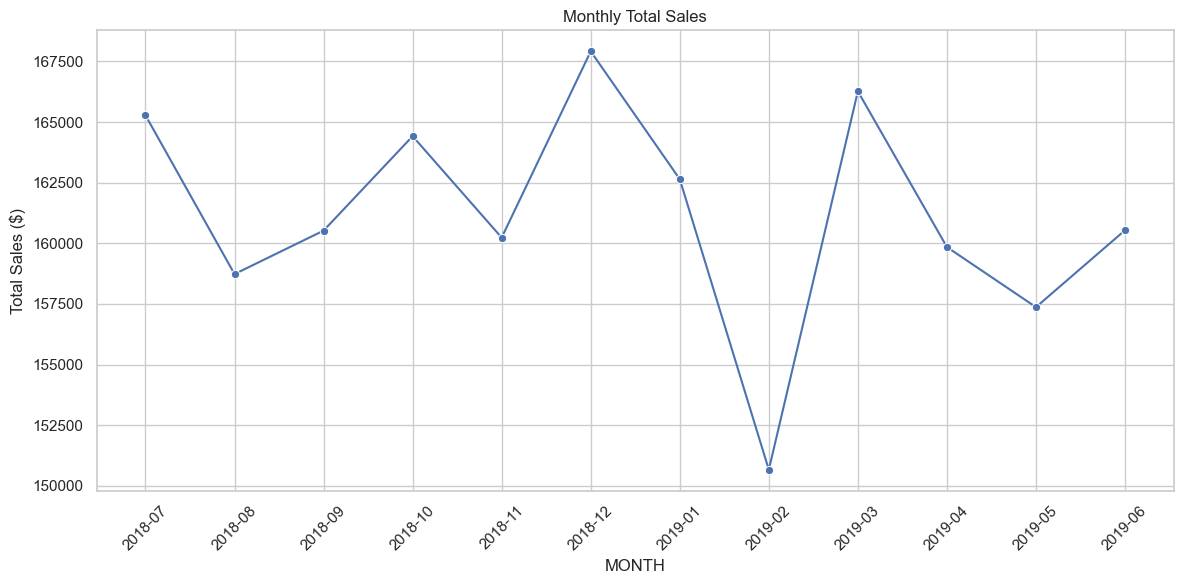

In [85]:
merged_df['MONTH'] = merged_df['DATE'].dt.to_period('M')
monthly_sales = merged_df.groupby('MONTH')['TOT_SALES'].sum().reset_index()
monthly_sales['MONTH'] = monthly_sales['MONTH'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='MONTH', y='TOT_SALES', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Total Sales')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()


## Key Insights

- Older Singles/Couples dominate total sales ($402,426.75) and also represent the largest share of units sold (104,203 units). This segment contributes significantly despite being only about 20.1% of the demographic, indicating high purchasing frequency or volume per customer.

- New Families contribute the lowest sales ($50,433.45) and smallest unit volume (12,847 units), which aligns with their small demographic share (3.5%). Their average spend per customer ($19.79) is also the lowest, suggesting lower engagement or fewer purchases per customer.

- Product-wise, Dorito Corn Chp Supreme 380g leads with $40,352 in sales and 6,509 units sold. The quantity sold is close to Kettle Mozzarella Basil & Pesto 175g (6,381 units), signaling strong competition within top-selling SKUs. This suggests that while Doritos edges out as top seller, consumer preferences are diverse among premium chip flavors.

- Older Families and Young Families also contribute substantial sales ($353,767 and $316,160 respectively), with average spend per customer relatively high ($36.17 and $34.45). This indicates strong purchasing power and loyalty in family segments.

- Spending trends appear stable across months, with minor fluctuations, showing consistent demand over the period analyzed.



## Recommendations

- Focus marketing efforts on New Families to increase their engagement and spending. Given their small current share and low average spend, targeted promotions, bundle offers, or tailored messaging could encourage higher purchase frequency and brand loyalty in this growing demographic segment.

- Continue nurturing the Older Singles/Couples segment with personalized offers that recognize their high purchase volume. Loyalty programs or premium product lines may help maintain and grow this already valuable group.

- Capitalize on product competition by highlighting unique features or flavors of top SKUs like Dorito Corn Chp Supreme and Kettle Mozzarella Basil & Pesto. Differentiated marketing could increase brand preference and encourage trial among undecided consumers.

- Explore cross-selling complementary products, such as dips or salsa, especially given the presence of salsa-related items in store sales data. Bundling chips with dips could boost average transaction value and improve customer experience.

- Leverage the consistent monthly sales trend to plan seasonal promotions strategically, ensuring inventory aligns with predictable demand cycles and maximizing sales during peak months.